## **Task-3 Customer Segmentation**

## **1. Importing Modules and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("/kaggle/input/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## **2. EDA - Understanding and Cleaning Data**

In [3]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
df.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

In [5]:
X = df[['annual_income_(k$)', 'spending_score_(1-100)']]

## **Model Training**

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

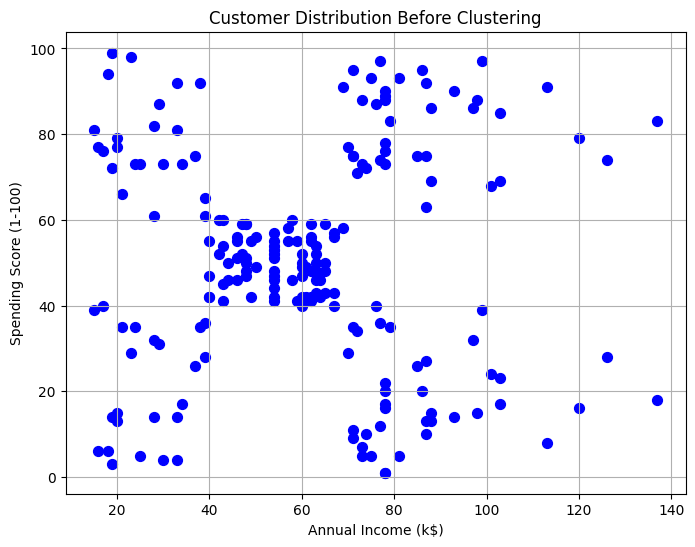

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X['annual_income_(k$)'], X['spending_score_(1-100)'], c='blue', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution Before Clustering')
plt.grid(True)
plt.show()

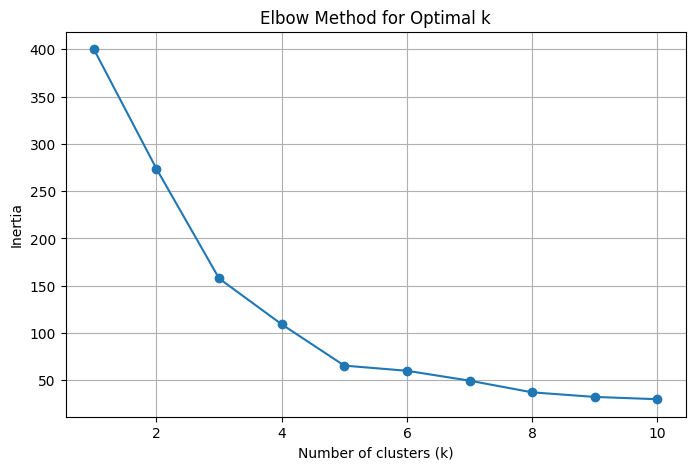

In [9]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [10]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

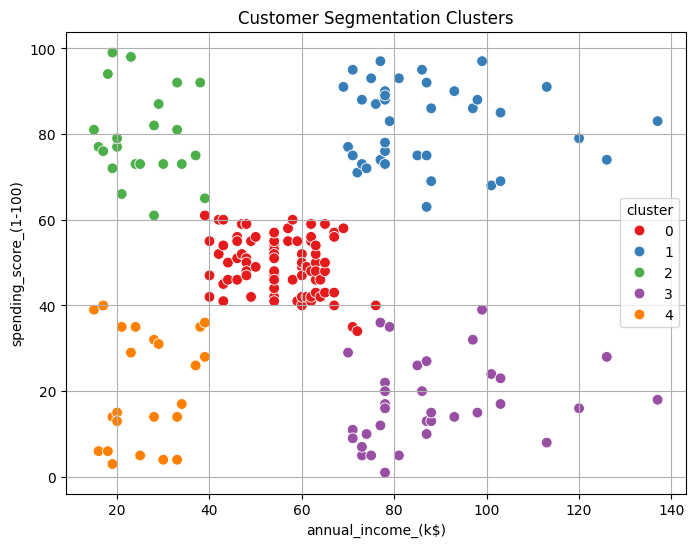

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='annual_income_(k$)', y='spending_score_(1-100)', hue='cluster', palette='Set1', s=60)
plt.title("Customer Segmentation Clusters")
plt.grid(True)
plt.show()

## **Bonus - DBSCAN**

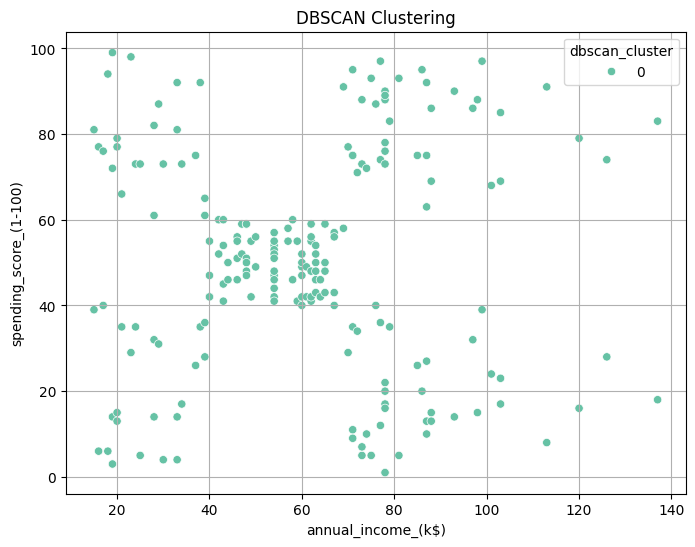

In [12]:
#Bonus Task
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=5)
df['dbscan_cluster'] = db.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='annual_income_(k$)', y='spending_score_(1-100)', hue='dbscan_cluster', palette='Set2')
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.show()

In [13]:
cluster_summary = df.groupby('cluster')[['annual_income_(k$)', 'spending_score_(1-100)']].mean()
print(cluster_summary)


         annual_income_(k$)  spending_score_(1-100)
cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
